<a href="https://colab.research.google.com/github/AtharvVichare/Lung-Cancer-Detector/blob/main/LungCancerDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Path to the uploaded zip file (replace 'your_file.zip' with the actual file name)
zip_file_path = "/content/test_data.zip"

# Extract the contents of the zip file
extract_path = "/content/"  # Specify the folder where files will be extracted

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    print(f"Files extracted to: {extract_path}")

# List the extracted files
print("Extracted files and directories:")
print(os.listdir(extract_path))

Files extracted to: /content/
Extracted files and directories:
['.config', 'test_data.zip', 'data.zip', 'lungmodel.h5', 'data', 'test_data', 'drive', 'sample_data']


In [ ]:
!pip install tensorflow==2.15.0 # Install a compatible TensorFlow version
!pip install tensorflow-addons==0.21.0 # Install the specified version of TensorFlow Addons
!pip install keras # Install a compatible Keras version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import tensorflow_addons as tfa # After re-installation of tensorflow_addons, import should work
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50
from tensorflow.keras.utils import load_img, img_to_array, array_to_img # Import load_img, img_to_array, and array_to_img from tensorflow.keras.utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator from tensorflow.keras.preprocessing.image

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [ ]:
directory = '/content/data'

categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

In [ ]:
size_data = {}
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1

    size_data[i] = temp_dict

size_data

<ipython-input-5-b77470758d58>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  height, width, channels = imageio.imread(filepath).shape


{'Bengin cases': {'512 x 512': 100},
 'Malignant cases': {'512 x 512': 150},
 'Normal cases': {'512 x 512': 150}}

Bengin cases


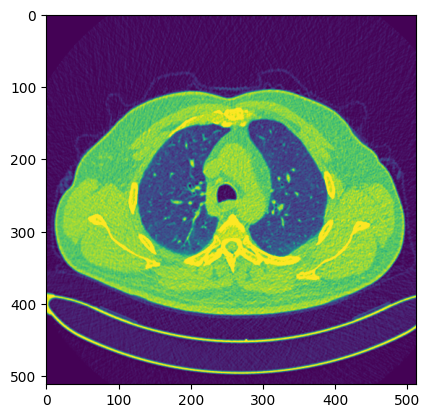

Malignant cases


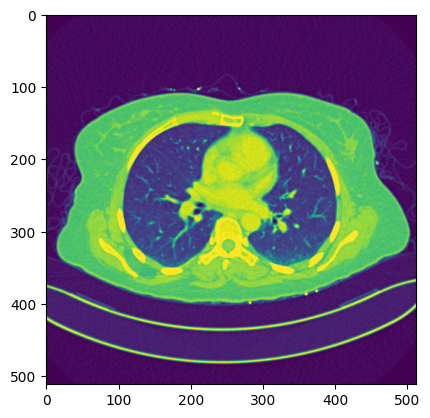

Normal cases


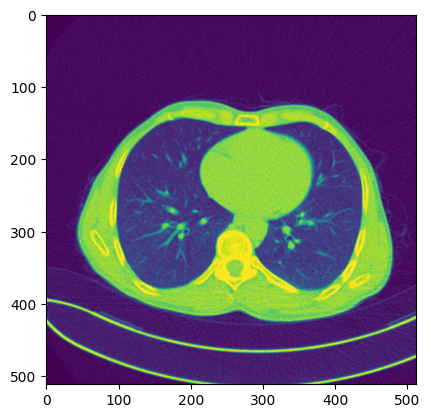

In [ ]:
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

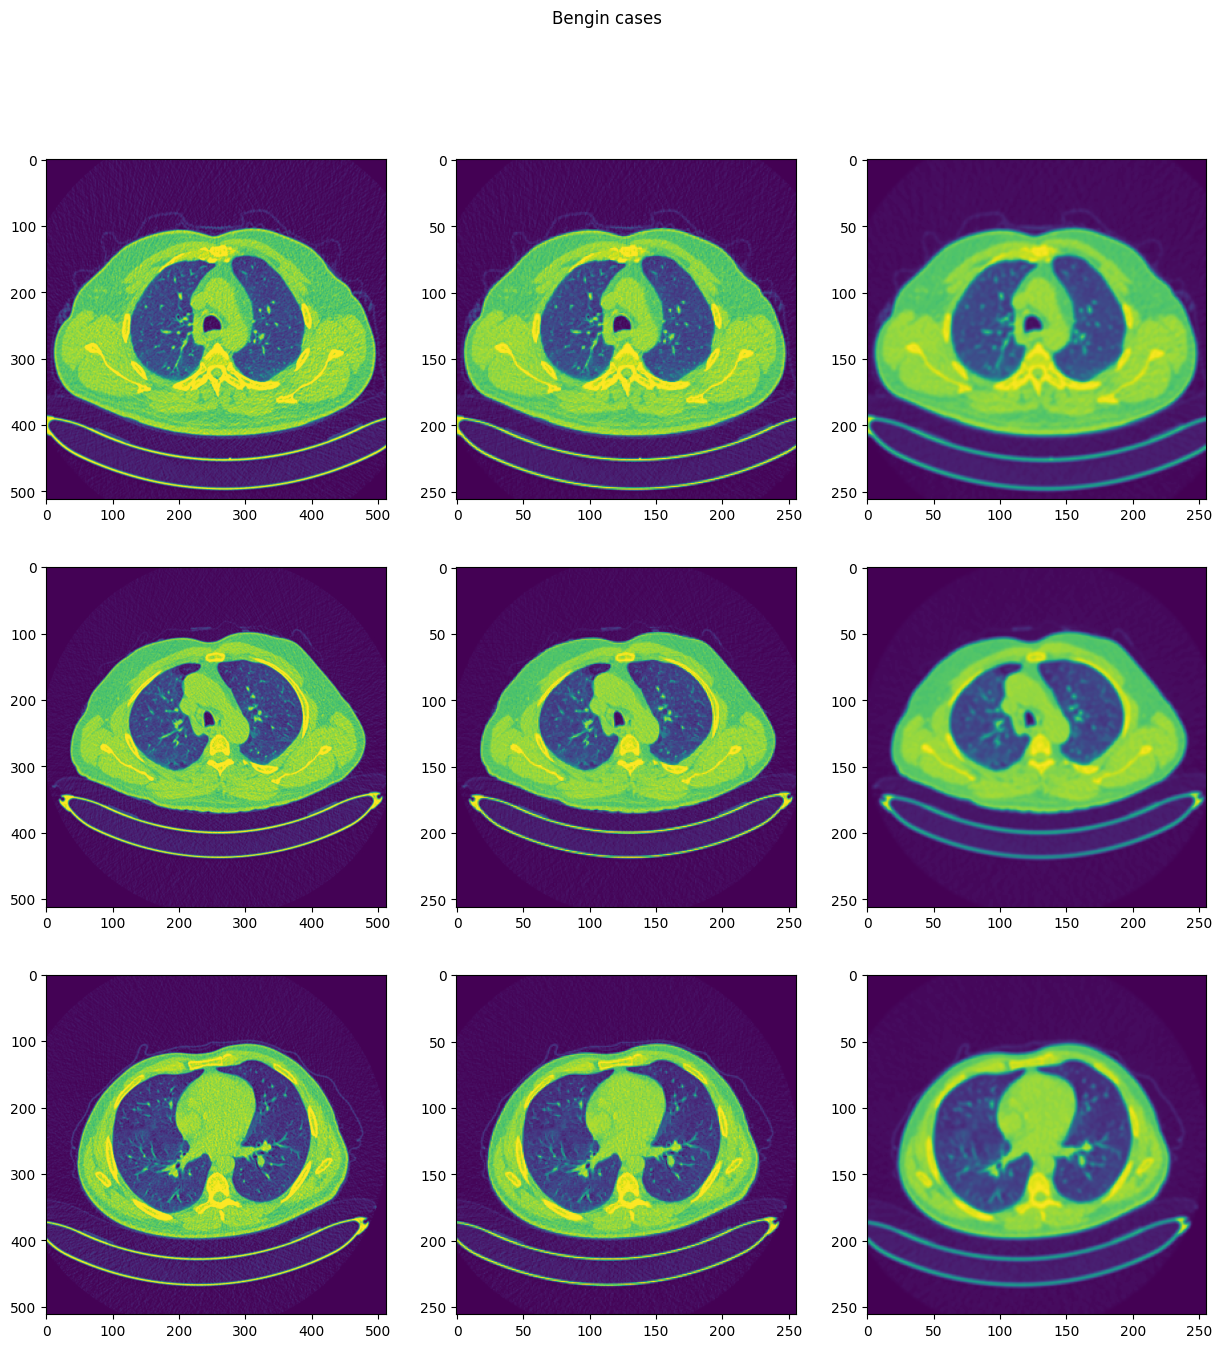

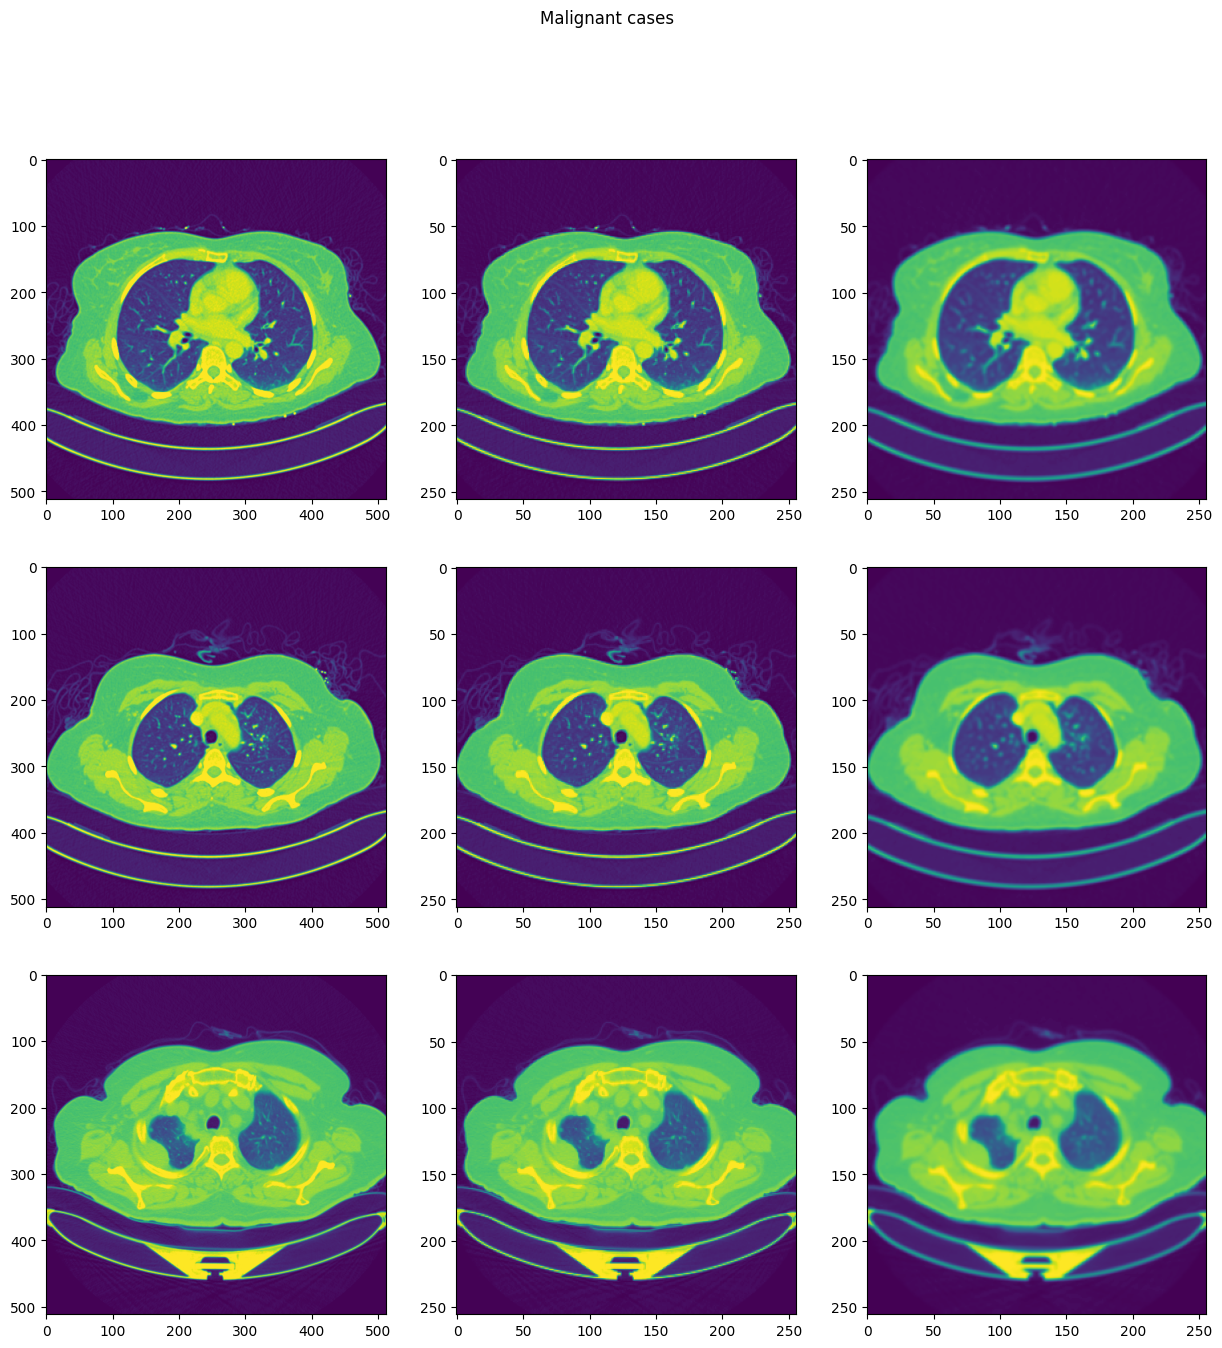

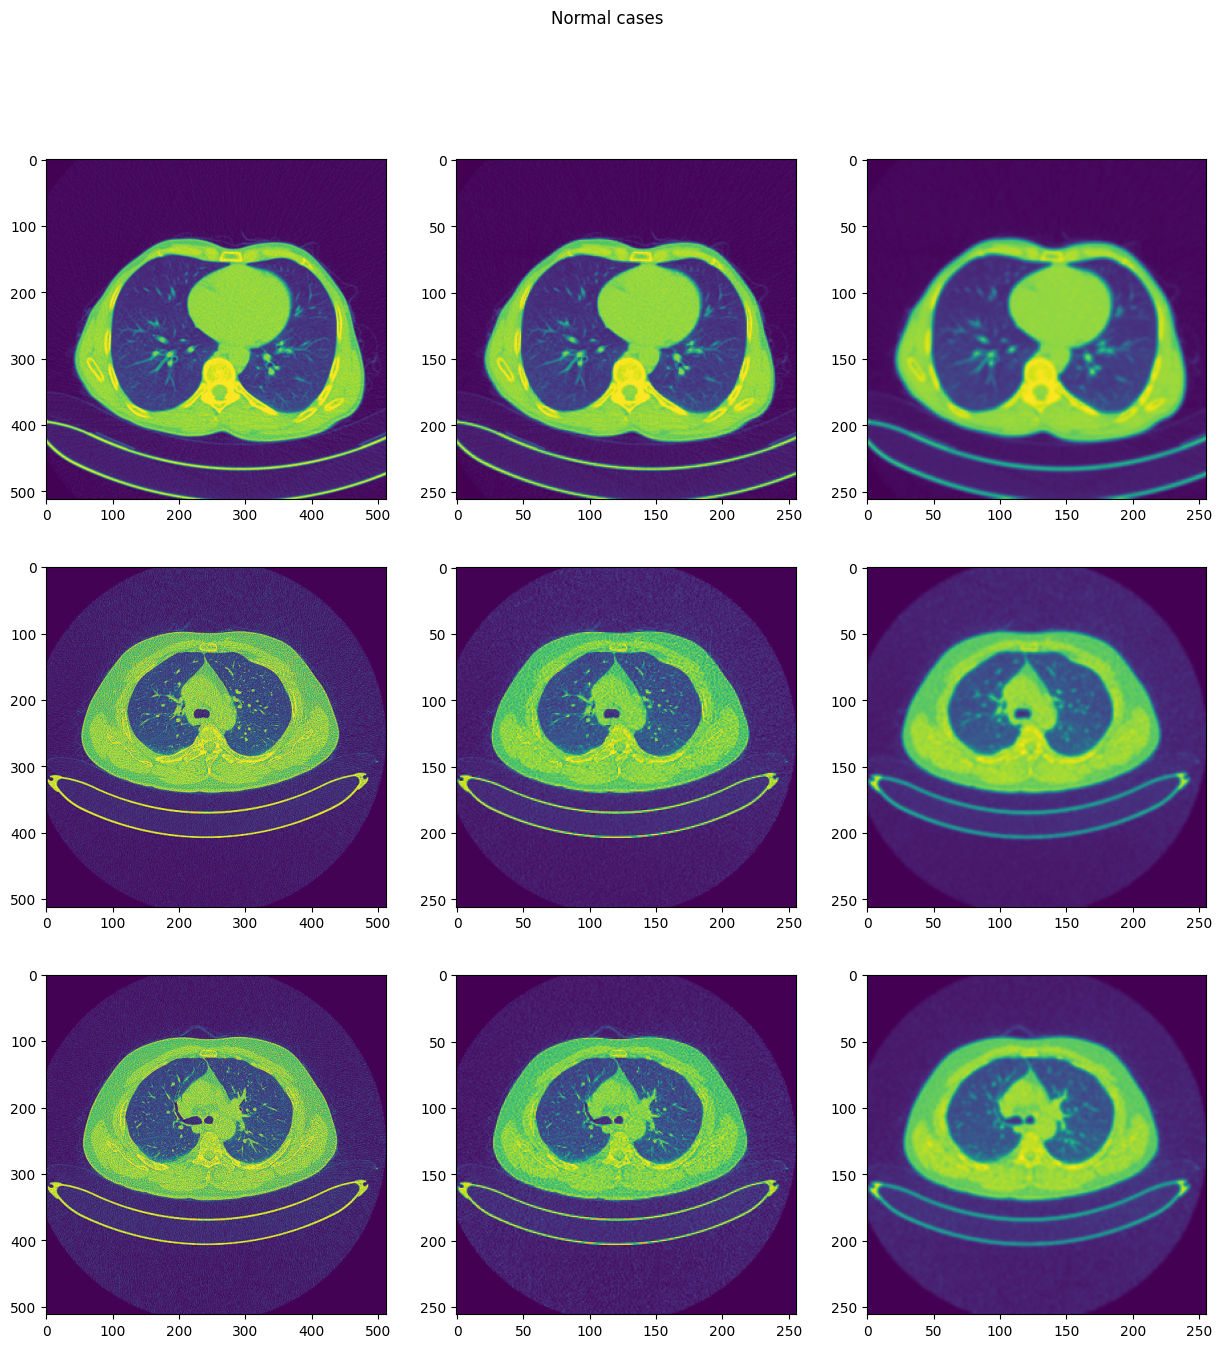

In [ ]:
img_size = 256
for i in categories:
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)

    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)

        img0 = cv2.resize(img, (img_size, img_size))

        img1 = cv2.GaussianBlur(img0, (5, 5), 0)

        ax[cnt, 0].imshow(img)
        ax[cnt, 1].imshow(img0)
        ax[cnt, 2].imshow(img1)
        cnt += 1
        if cnt == samples:
            break

plt.show()

In [ ]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])

random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)

print('X length:', len(X))
print('y counts:', Counter(y))

# normalize
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0 #feature scaling
y = np.array(y)

X length: 400
y counts: Counter({1: 150, 2: 150, 0: 100})


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

300 (300, 256, 256, 1)
100 (100, 256, 256, 1)


In [ ]:
print(Counter(y_train), Counter(y_valid))

Counter({1: 113, 2: 112, 0: 75}) Counter({2: 38, 1: 37, 0: 25})


In [ ]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

300 (300, 256, 256, 1)
300 (300, 65536)


In [ ]:
print('Before SMOTE:', Counter(y_train))
smote = SMOTE()  #generating synthetic samples for the minority class like 2, 0 key in the dict
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({1: 113, 2: 112, 0: 75})
After SMOTE: Counter({1: 113, 2: 113, 0: 113})


In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

300 (300, 256, 256, 1)
339 (339, 256, 256, 1)


In [ ]:
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:])) #conv2d - adding cnn layres
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D -

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(16))
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      640       
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
43/43 [==============================] - 6s 48ms/step - loss: 1.1828 - accuracy: 0.7198 - val_loss: 0.3270 - val_accuracy: 0.8700
Epoch 2/20
43/43 [==============================] - 1s 21ms/step - loss: 0.0973 - accuracy: 0.9823 - val_loss: 0.2719 - val_accuracy: 0.9400
Epoch 3/20
43/43 [==============================] - 1s 21ms/step - loss: 0.0565 - accuracy: 0.9853 - val_loss: 0.1298 - val_accuracy: 0.9600
Epoch 4/20
43/43 [==============================] - 1s 22ms/step - loss: 0.0350 - accuracy: 0.9882 - val_loss: 0.0963 - val_accuracy: 0.9600
Epoch 5/20
43/43 [==============================] - 1s 21ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0851 - val_accuracy: 0.9800
Epoch 6/20
43/43 [==============================] - 1s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 0.9800
Epoch 7/20
43/43 [==============================] - 1s 23ms/step - loss: 0.0396 - accuracy: 0.9941 - val_loss: 0.0845 - val_accuracy: 0.9700
Epoch 8/20
43

In [ ]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

4/4 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      0.97      0.99        37
           2       0.97      1.00      0.99        38

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

[[24  0  1]
 [ 1 36  0]
 [ 0  0 38]]


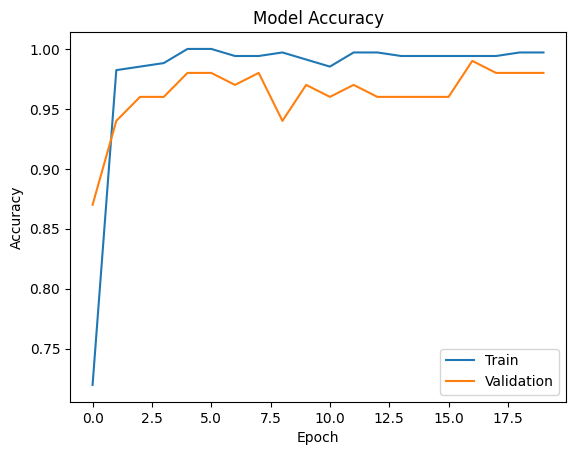

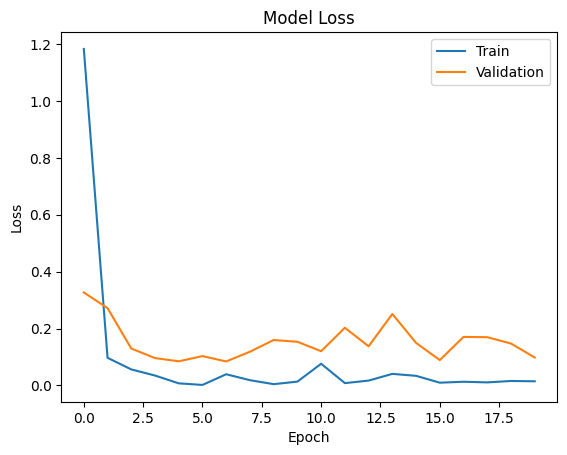

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Initialize the Sequential model
model2 = Sequential()

# First convolutional layer:
# - 64 filters (output channels)
# - (3, 3) kernel size (filter size)
# - input_shape is automatically inferred from the shape of the training data (X_train)
# Activation function: ReLU (Rectified Linear Unit)
model2.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))  # Add first Conv2D layer
model2.add(Activation('relu'))  # Apply ReLU activation function

# Max pooling layer: reduces spatial dimensions by taking the max value over a pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer:
# - 64 filters (output channels)
# - (3, 3) kernel size
# Activation function: ReLU
model2.add(Conv2D(64, (3, 3), activation='relu'))

# Max pooling layer: reduces spatial dimensions again with pool size 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layer into a 1D vector to feed into fully connected (dense) layers
model2.add(Flatten())

# Fully connected layer: 16 neurons (this is a dense layer)
model2.add(Dense(16))

# Final fully connected layer: 3 neurons, output layer for classification with 3 classes
# Activation function: Softmax, used for multi-class classification
model2.add(Dense(3, activation='softmax'))

# Display the summary of the model architecture
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_1 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 246016)           

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

# new_weights[0] = 0.5
# new_weights[1] = 20

new_weights

{0: 1.3333333333333333, 1: 0.8849557522123894, 2: 0.8928571428571429}

In [ ]:
# Fit the model to the training data (X_train) and labels (y_train)
history = model2.fit(
    X_train,                # Training data features
    y_train,                # Training data labels
    batch_size=8,           # Number of samples per gradient update. Here, batch size is set to 8.
    epochs=20,              # The number of times the model will iterate over the entire training data
    validation_data=(X_valid, y_valid),  # Validation data for evaluating performance after each epoch
    class_weight=new_weights  # Adjusts the model's weight for each class to handle class imbalance
)

Epoch 1/20
38/38 [==============================] - 3s 44ms/step - loss: 2.0965 - accuracy: 0.5967 - val_loss: 0.3962 - val_accuracy: 0.8500
Epoch 2/20
38/38 [==============================] - 1s 21ms/step - loss: 0.2424 - accuracy: 0.9233 - val_loss: 0.1896 - val_accuracy: 0.9100
Epoch 3/20
38/38 [==============================] - 1s 23ms/step - loss: 0.0597 - accuracy: 0.9800 - val_loss: 0.1285 - val_accuracy: 0.9500
Epoch 4/20
38/38 [==============================] - 1s 21ms/step - loss: 0.0344 - accuracy: 0.9867 - val_loss: 0.1218 - val_accuracy: 0.9800
Epoch 5/20
38/38 [==============================] - 1s 21ms/step - loss: 0.0301 - accuracy: 0.9933 - val_loss: 0.1880 - val_accuracy: 0.9600
Epoch 6/20
38/38 [==============================] - 1s 21ms/step - loss: 0.0310 - accuracy: 0.9933 - val_loss: 0.0864 - val_accuracy: 0.9600
Epoch 7/20
38/38 [==============================] - 1s 21ms/step - loss: 0.0219 - accuracy: 0.9900 - val_loss: 0.0982 - val_accuracy: 0.9800
Epoch 8/20
38

In [ ]:
# Get model predictions for the validation data (X_valid)
# model2.predict returns probabilities for each class
y_pred = model2.predict(X_valid, verbose=1)

# Convert the predicted probabilities to class labels by selecting the index with the highest probability
# np.argmax returns the index of the maximum value along the specified axis (axis=1 means across columns, i.e., the class axis)
y_pred_bool = np.argmax(y_pred, axis=1)

# Print a detailed classification report including precision, recall, F1-score for each class
print(classification_report(y_valid, y_pred_bool))

# Print the confusion matrix to evaluate the performance of the classification model
print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))


4/4 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      1.00      1.00        37
           2       0.97      0.97      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

[[24  0  1]
 [ 0 37  0]
 [ 1  0 37]]


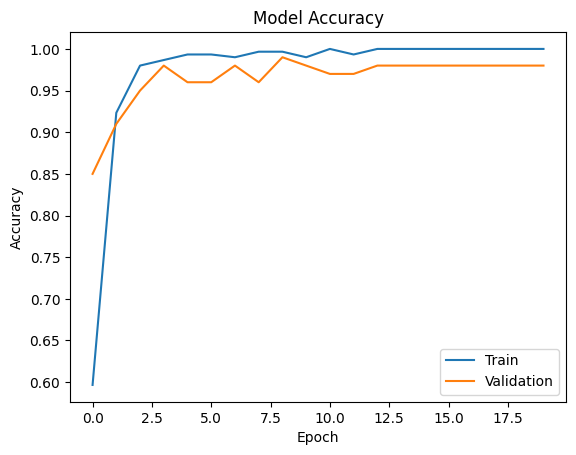

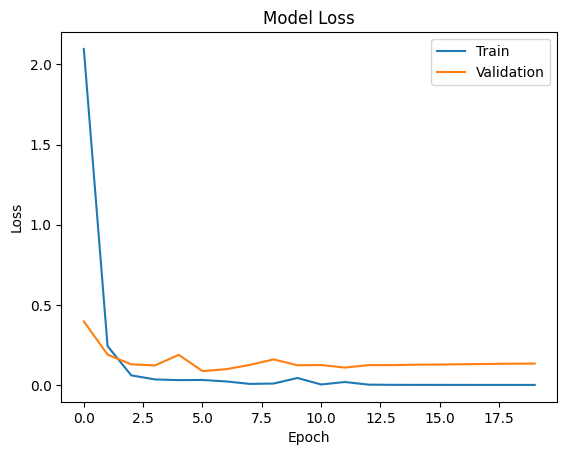

In [ ]:
# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'], label='Train')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation')  # Validation accuracy
plt.title('Model Accuracy')  # Title for the plot
plt.ylabel('Accuracy')  # Y-axis label
plt.xlabel('Epoch')  # X-axis label
plt.legend()  # Display legend to distinguish train and validation curves
plt.show()  # Show the plot

# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'], label='Train')  # Training loss
plt.plot(history.history['val_loss'], label='Validation')  # Validation loss
plt.title('Model Loss')  # Title for the plot
plt.ylabel('Loss')  # Y-axis label
plt.xlabel('Epoch')  # X-axis label
plt.legend()  # Display legend to distinguish train and validation curves
plt.show()  # Show the plot


In [ ]:
# model2.save('lungmodel.h5')

In [ ]:
# Training data augmentation
train_datagen = ImageDataGenerator(
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True     # Randomly flip images vertically
)

# Validation data (no augmentation, only normalization if needed)
val_datagen = ImageDataGenerator()  # No augmentation for validation data


In [ ]:
# Generate augmented batches of data for training
train_generator = train_datagen.flow(X_train, y_train, batch_size=8)

# Generate batches of data for validation (no augmentation)
val_generator = val_datagen.flow(X_valid, y_valid,batch_size=8)

In [ ]:
# Initialize the Sequential model
model3 = Sequential()

# First convolutional layer:
# - 64 filters (output channels)
# - (3, 3) kernel size (filter size)
# - input_shape is automatically inferred from the shape of the training data (X_train)
# Activation function: ReLU (Rectified Linear Unit)
model3.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))  # Add first Conv2D layer
model3.add(Activation('relu'))  # Apply ReLU activation function

# Max pooling layer: reduces spatial dimensions by taking the max value over a pool size of 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer:
# - 64 filters (output channels)
# - (3, 3) kernel size
# Activation function: ReLU
model3.add(Conv2D(64, (3, 3), activation='relu'))

# Max pooling layer: reduces spatial dimensions again with pool size 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layer into a 1D vector to feed into fully connected (dense) layers
model3.add(Flatten())

# Fully connected layer: 16 neurons (this is a dense layer)
model3.add(Dense(16))

# Final fully connected layer: 3 neurons, output layer for classification with 3 classes
# Activation function: Softmax, used for multi-class classification
model3.add(Dense(3, activation='softmax'))

# Display the summary of the model architecture
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_2 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 246016)           

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model3.fit_generator(train_generator, epochs=20, validation_data=val_generator, class_weight=new_weights)

Epoch 1/20


<ipython-input-47-6f68d130dd0c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(train_generator, epochs=20, validation_data=val_generator, class_weight=new_weights)


38/38 [==============================] - 3s 34ms/step - loss: 7.5426e-06 - accuracy: 1.0000 - val_loss: 0.2252 - val_accuracy: 0.9700
Epoch 2/20
38/38 [==============================] - 1s 25ms/step - loss: 1.1201e-07 - accuracy: 1.0000 - val_loss: 0.2580 - val_accuracy: 0.9900
Epoch 3/20
38/38 [==============================] - 1s 23ms/step - loss: 9.3404e-08 - accuracy: 1.0000 - val_loss: 0.2684 - val_accuracy: 0.9900
Epoch 4/20
38/38 [==============================] - 1s 22ms/step - loss: 1.4972e-06 - accuracy: 1.0000 - val_loss: 0.3006 - val_accuracy: 0.9700
Epoch 5/20
38/38 [==============================] - 1s 22ms/step - loss: 8.1154e-08 - accuracy: 1.0000 - val_loss: 0.3355 - val_accuracy: 0.9700
Epoch 6/20
38/38 [==============================] - 1s 22ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.2687 - val_accuracy: 0.9500
Epoch 7/20
38/38 [==============================] - 1s 23ms/step - loss: 0.0655 - accuracy: 0.9833 - val_loss: 0.4115 - val_accuracy: 0.9300
Epoc

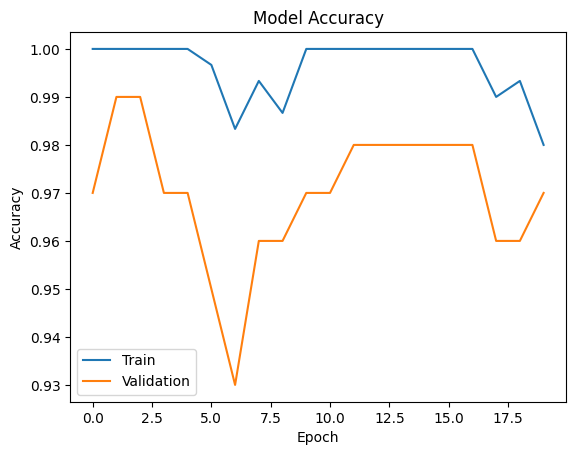

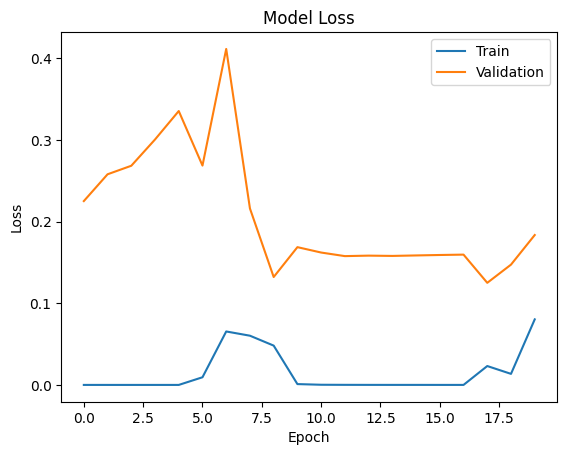

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model3.save('lungmodel.h5')

In [ ]:
from keras.models import load_model

# Load the saved model
model = load_model('lungmodel.h5')

In [ ]:
new_directory = '/content/test_data'

In [ ]:
import cv2
import os
import numpy as np

# Preprocess images
def preprocess_image(filepath, img_size=256):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize
    img = img.reshape(1, img_size, img_size, 1)  # Add batch dimension
    return img
import cv2
import os
import numpy as np

# Preprocess images
def preprocess_image(filepath, img_size=256):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize
    img = img.reshape(1, img_size, img_size, 1)  # Add batch dimension
    return img

# List all images in the new dataset
new_images = [os.path.join(new_directory, file) for file in os.listdir(new_directory)]
def preprocess_image(filepath, img_size=256):
    # Read the image in grayscale (single channel)
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    # Resize the image to the desired size (img_size x img_size)
    img = cv2.resize(img, (img_size, img_size))

    # Normalize pixel values to be between 0 and 1
    img = img / 255.0

    # Reshape image to have a batch dimension (1, img_size, img_size, 1)
    img = img.reshape(1, img_size, img_size, 1)

    return img

    # Resize the image to the desired size (img_size x img_size)
    img = cv2.resize(img, (img_size, img_size))

    # Normalize pixel values to be between 0 and 1
    img = img / 255.0

    # Reshape image to have a batch dimension (1, img_size, img_size, 1)
    img = img.reshape(1, img_size, img_size, 1)

    return img

In [ ]:
# Class labels
categories = ['Benign', 'Malignant', 'Normal']

# Predict on new images
for image_path in new_images:
    img = preprocess_image(image_path)  # Preprocess the image
    prediction = model.predict(img)     # Get the model's prediction for the image
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the class with the highest probability
    confidence = prediction[0][predicted_class]  # Get the confidence for the predicted class


    print(f"Image: {os.path.basename(image_path)}")
    print(f"Predicted Class: {categories[predicted_class]} (Confidence: {confidence:.2f})")
    print("-" * 30)

1/1 [==============================] - 0s 266ms/step
Image: 002124_02_02_251.png
Predicted Class: Benign (Confidence: 1.00)
------------------------------
1/1 [==============================] - 0s 17ms/step
Image: 000207_03_01_075.png
Predicted Class: Normal (Confidence: 0.89)
------------------------------
1/1 [==============================] - 0s 16ms/step
Image: 002463_01_01_029.png
Predicted Class: Malignant (Confidence: 1.00)
------------------------------
1/1 [==============================] - 0s 16ms/step
Image: 000266_04_01_030.png
Predicted Class: Malignant (Confidence: 0.88)
------------------------------
1/1 [==============================] - 0s 16ms/step
Image: 003412_03_01_108.png
Predicted Class: Benign (Confidence: 0.55)
------------------------------
1/1 [==============================] - 0s 16ms/step
Image: 000230_04_01_242.png
Predicted Class: Normal (Confidence: 0.77)
------------------------------
1/1 [==============================] - 0s 16ms/step
Image: 002435_04_

1/1 [==============================] - 0s 18ms/step


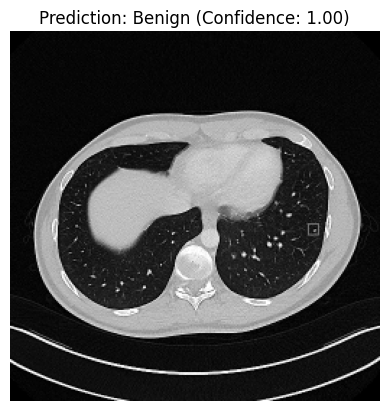

1/1 [==============================] - 0s 18ms/step


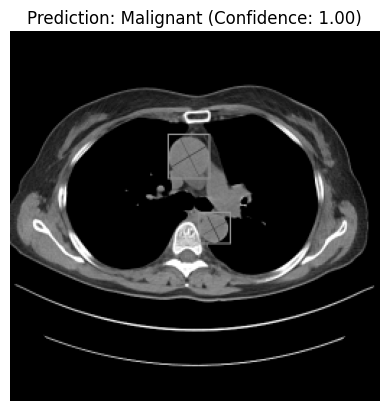

1/1 [==============================] - 0s 16ms/step


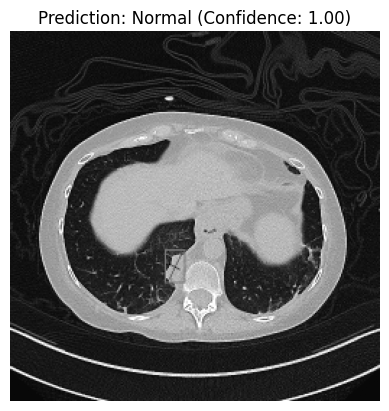

1/1 [==============================] - 0s 17ms/step


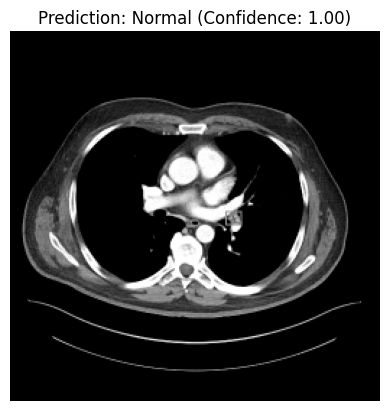

1/1 [==============================] - 0s 25ms/step


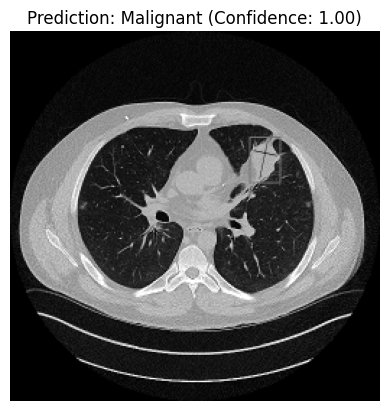

1/1 [==============================] - 0s 18ms/step


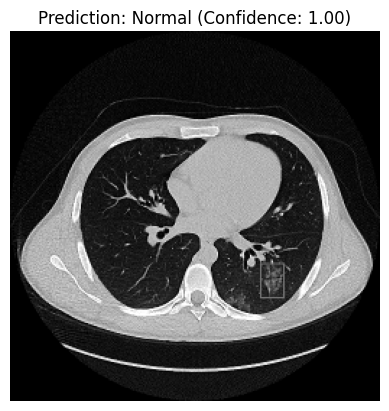

1/1 [==============================] - 0s 18ms/step


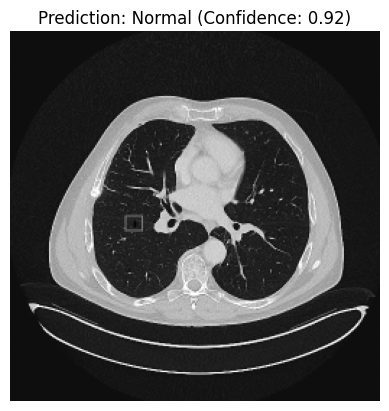

1/1 [==============================] - 0s 17ms/step


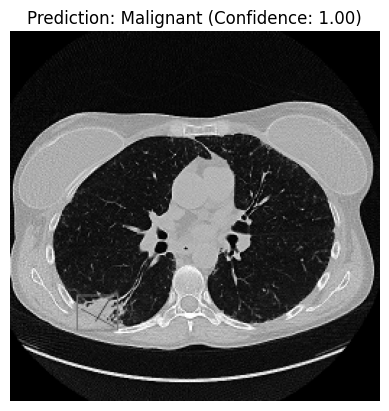

1/1 [==============================] - 0s 25ms/step


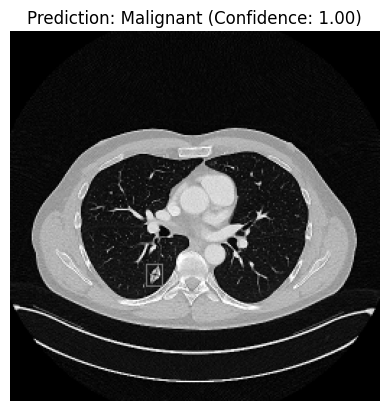

1/1 [==============================] - 0s 17ms/step


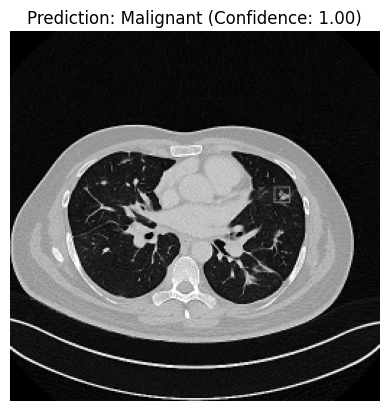

In [ ]:
  import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Class labels
categories = ['Benign', 'Malignant', 'Normal']

# Assuming `new_images` and `model` are already defined in your notebook

# Visualize predictions with confidence
count = 0  # Counter for displayed images
for image_path in new_images:  # Iterate through all new images
    img_preprocessed = preprocess_image(image_path)
    prediction = model.predict(img_preprocessed)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class]

    # Check if confidence is above 90% and we haven't displayed 10 images yet
    if confidence > 0.90 and count < 10:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (256, 256))

        plt.imshow(img_resized, cmap='gray')
        plt.title(f"Prediction: {categories[predicted_class]} (Confidence: {confidence:.2f})")
        plt.axis('off')
        plt.show()

        count += 1  # Increment counter after displaying an image

    # Stop if we've displayed 10 images
    if count >= 10:
        break
